# Nguyen Vinh Nghi 

# CE182108

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

/home/winter24/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [5]:
def draw_img(image, title):
    plt.subplot(1, 2, 2)
    plt.imshow(image)
    plt.title(title)

    plt.show()

# Function 1

In [6]:
def ransac_image_alignment(image1, image2, num_iterations=100, tolerance=0.5):
    gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    orb = cv2.ORB_create()
    keypoints1, descriptors1 = orb.detectAndCompute(gray1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(gray2, None)

    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(descriptors1, descriptors2)

    points1 = np.float32([keypoints1[m.queryIdx].pt for m in matches])
    points2 = np.float32([keypoints2[m.trainIdx].pt for m in matches])

    best_H = None
    max_inliers = 0

    for _ in range(num_iterations):
        indices = np.random.choice(len(points1), 4, replace=False)
        src_points = points1[indices]
        dst_points = points2[indices]
        H, _ = cv2.findHomography(src_points, dst_points, method=0)
        
        warped_image1 = cv2.warpPerspective(image1, H, (image2.shape[1], image2.shape[0]))
        diff = np.abs(warped_image1 - image2)
        inliers = np.sum(diff < tolerance)
        if inliers > max_inliers:
            best_H = H
            max_inliers = inliers
    aligned_image = cv2.warpPerspective(image1, best_H, (image2.shape[1], image2.shape[0]))
    return aligned_image, best_H

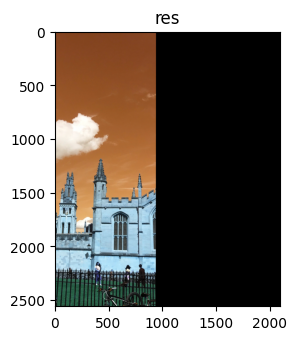

In [7]:
image1 = cv2.imread('./image1.jpeg')
image2 = cv2.imread('./image2.jpeg')
aligned_image, H = ransac_image_alignment(image1, image2)
draw_img(aligned_image, "res")